# Makine Öğrenmesi - 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Naive Bayes Classification

In [2]:
#Gaussian Naive Bayes Classifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [3]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 3


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [5]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

In [6]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 16


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.11      0.20        18
           2       0.45      1.00      0.62        13

    accuracy                           0.64        45
   macro avg       0.82      0.70      0.61        45
weighted avg       0.84      0.64      0.57        45



## Support Vector Machines

In [8]:
from sklearn import svm

#Define your data
X, y = load_iris(return_X_y=True)

SVC = svm.SVC(kernel='linear') #Specify kernel as 'RBF' or 'linear' if needed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

SVC.fit(X_train, y_train)

#For regression analysis use: SVR = svm.SVR()

y_pred = SVC.predict(X_test)

In [9]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 0


The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

Increasing C have a similar effect with increasing number of neighbors in KNN classifiers. It provides better fitting, but introduces a risk of overfitting.

In [10]:
y_pred  = svm.SVC(kernel='linear', C=1E6).fit(X_train, y_train).predict(X_test)

In [11]:
y_pred  = svm.SVC(kernel='linear', C=1E10).fit(X_train, y_train).predict(X_test)

In [12]:
y_pred  = svm.SVC(kernel='rbf', C=1E10).fit(X_train, y_train).predict(X_test)

In [13]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 3


In [14]:
len(SVC.support_vectors_)

22

In [15]:
SVC.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.5, 2.3, 1.3, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 2.7, 5.1, 1.6],
       [6.9, 3.1, 4.9, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3. , 4.8, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.94      0.89      0.91        18
           2       0.92      0.92      0.92        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

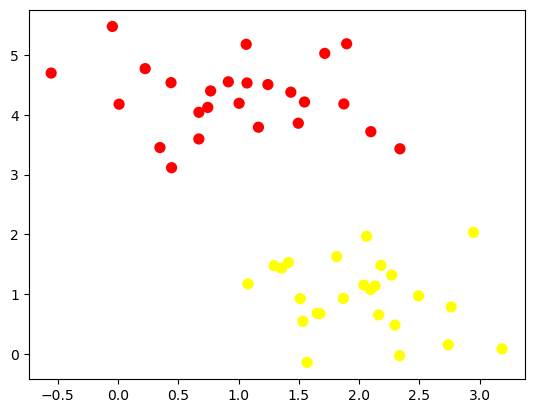

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

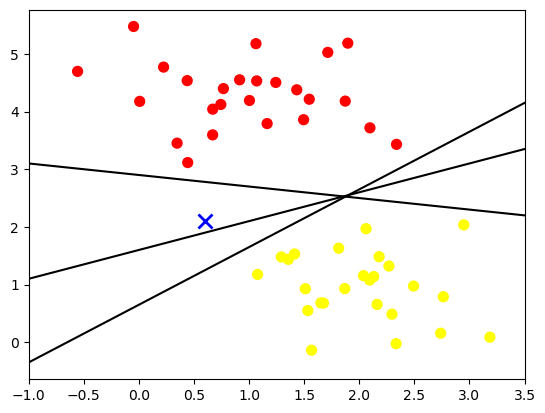

In [19]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In SVM, however, we work in a deterministic manner, first detecting parallel support vectors, then drawing the classifier as a result of our Machine Learning model.

In [20]:
SVC = svm.SVC(kernel='linear', C=1E10)
SVC.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

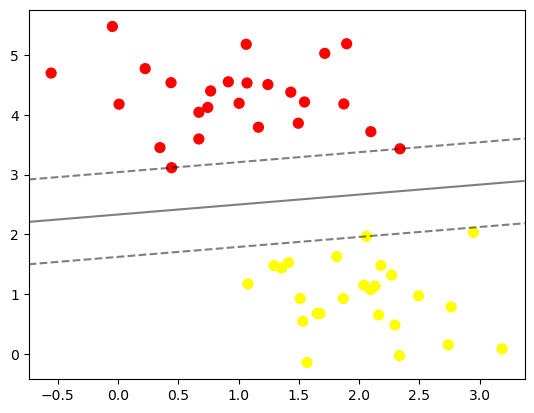

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(SVC)

## Decision trees and random forests

In [23]:
#from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba

In [25]:
print('Depth of the Decision Tree :', clf.get_depth())

Depth of the Decision Tree : 4


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



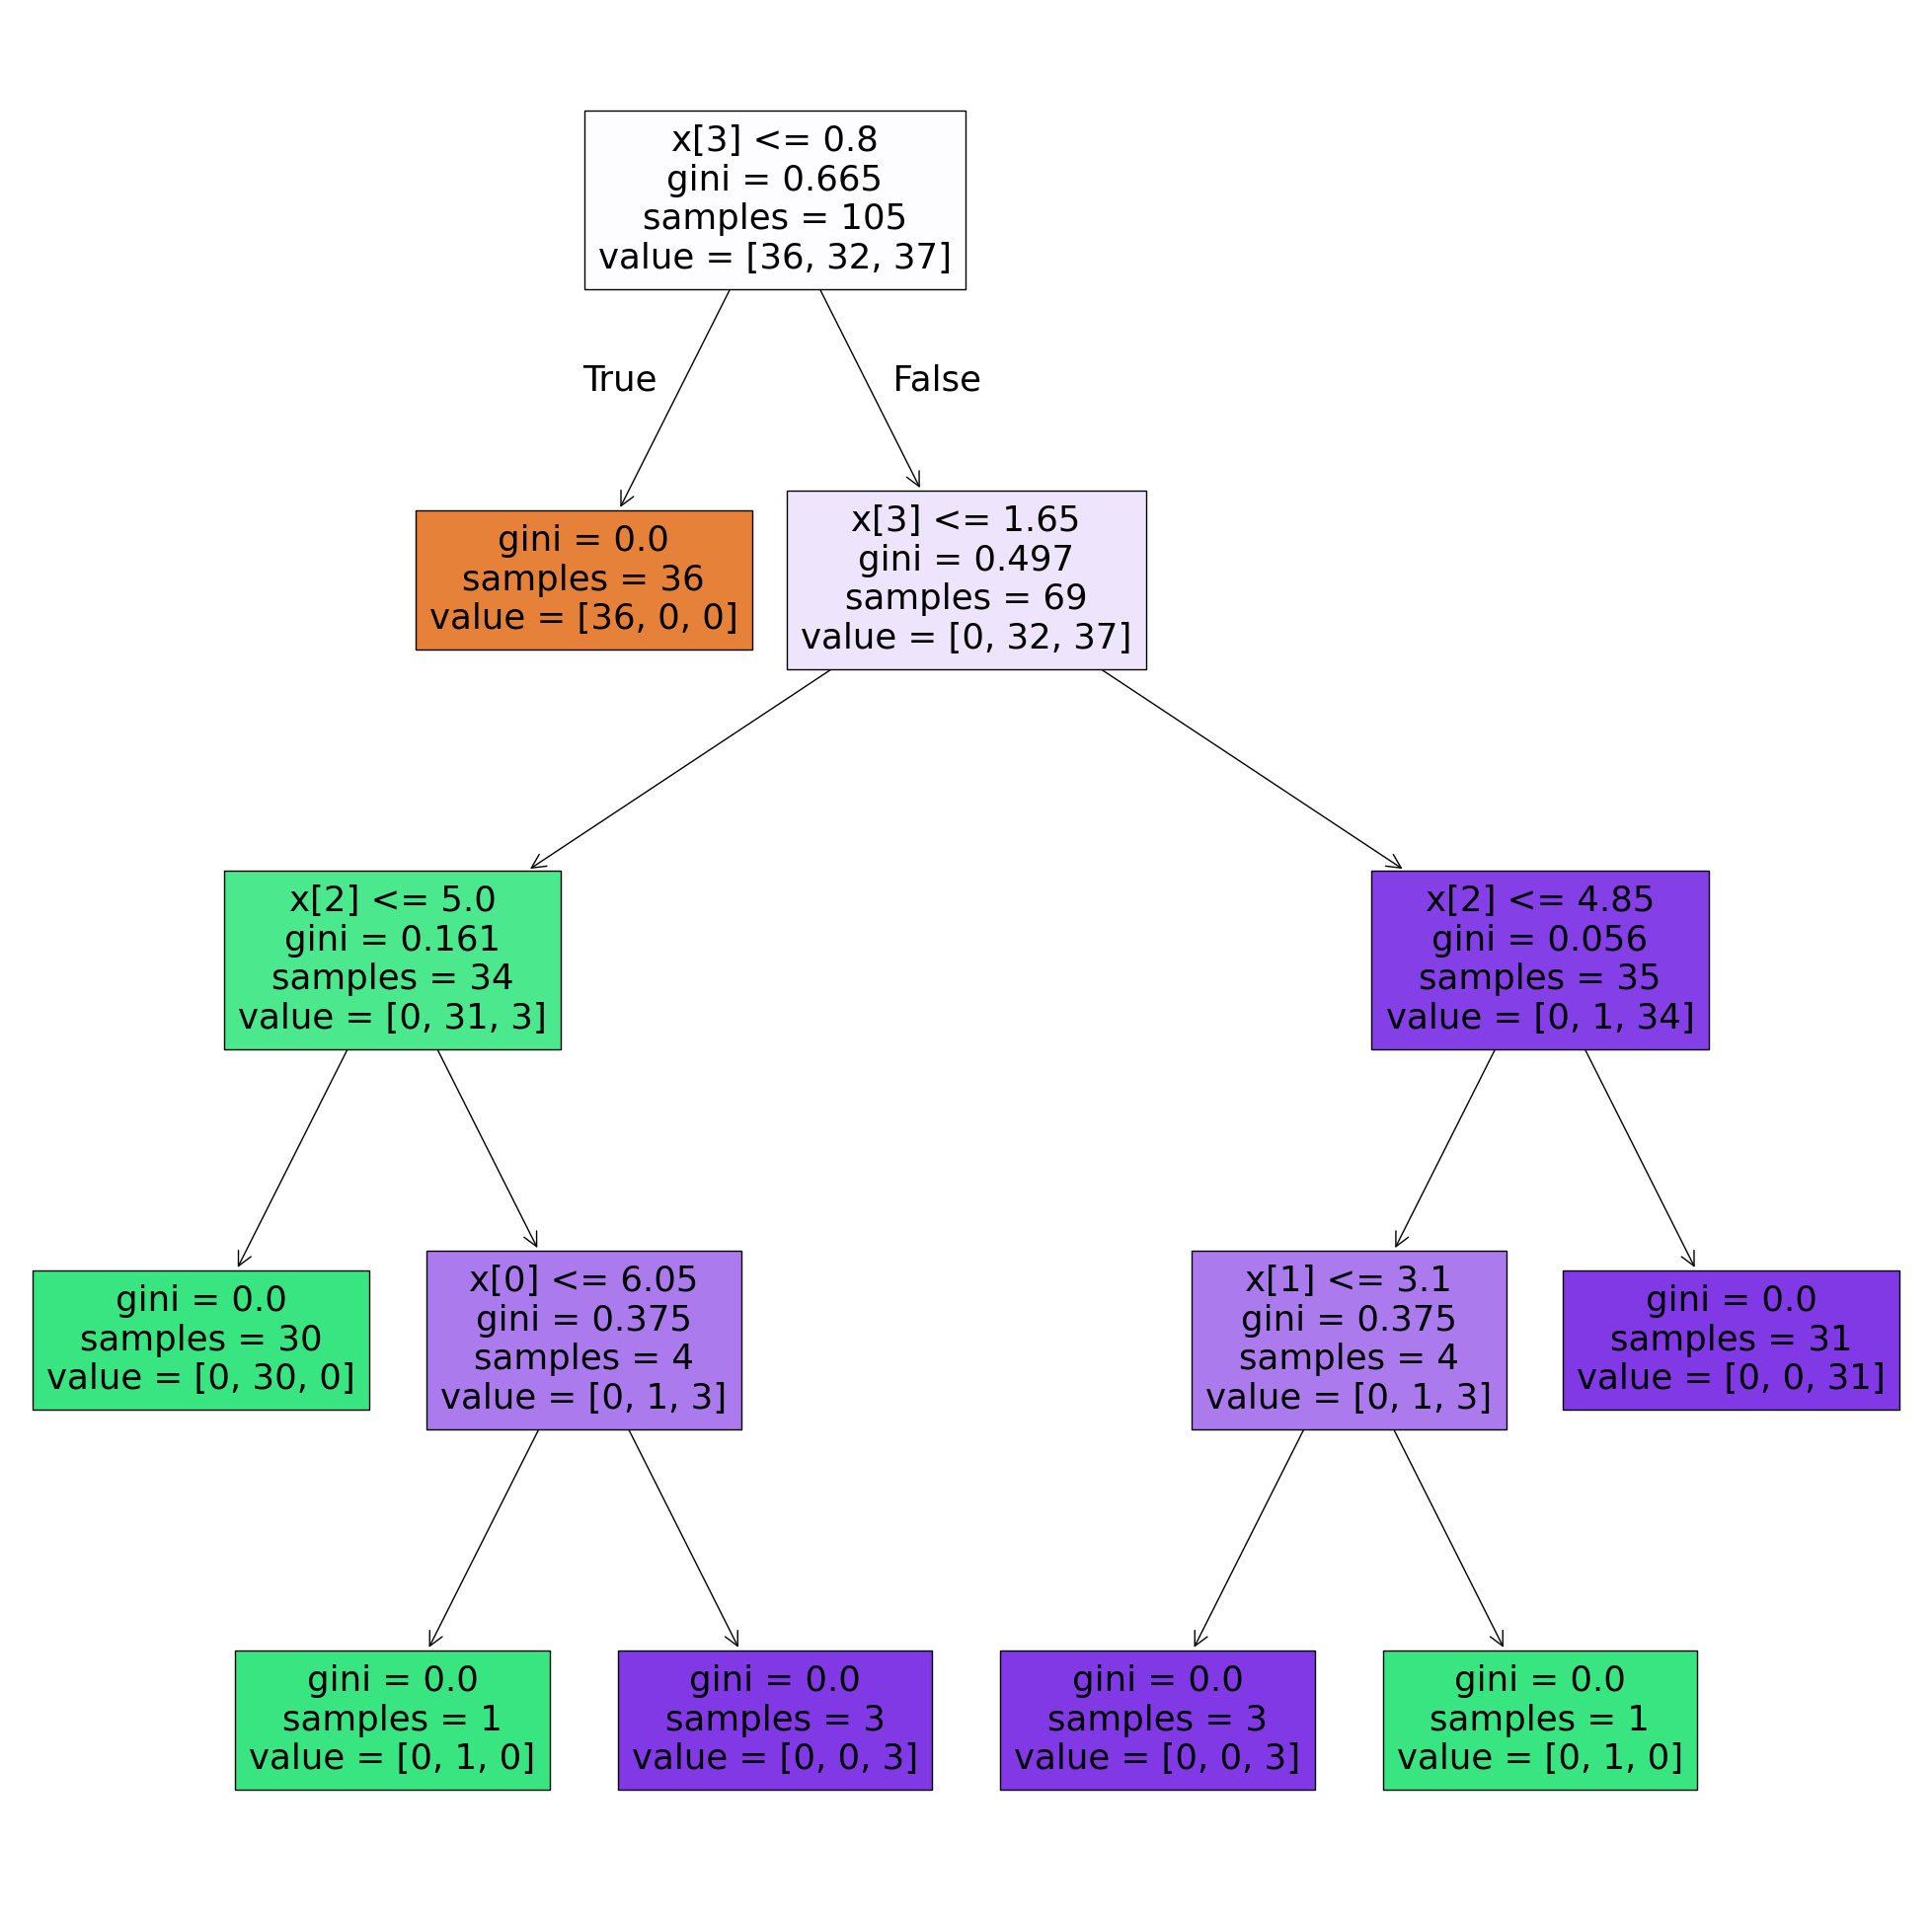

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
plot_tree(clf, filled=True)
plt.show()

In [28]:
X = X[:,0:2] #Let's assume X has two features, take the first two, and ignore the rest.

In [29]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/var/folders/h9/thx6895547x_97sspz8fvlph0000gn/T/ipykernel_68815/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


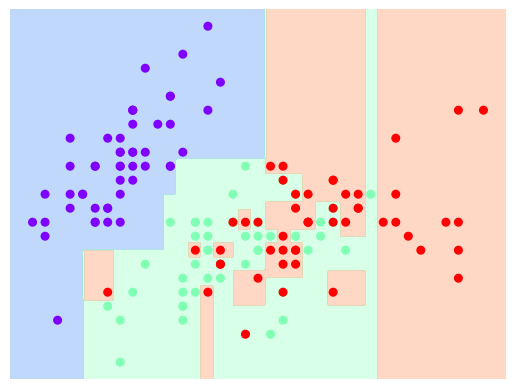

In [30]:
visualize_classifier(tree.DecisionTreeClassifier(criterion='gini'), X, y)

/var/folders/h9/thx6895547x_97sspz8fvlph0000gn/T/ipykernel_68815/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


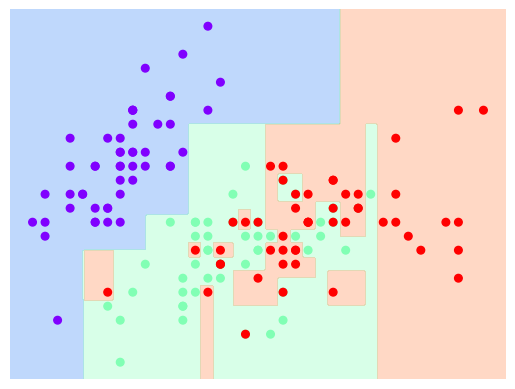

In [31]:
visualize_classifier(tree.DecisionTreeClassifier(criterion='entropy'), X, y)

#### Randomized Search with Decision Trees

Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

min_samples_leaf: The minimum number of samples required to be at a leaf node

max_features: It helps to find the number of features to take into account in order to make the best split.

In [32]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.9523809523809523


#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() #number of trees: n_estimators=?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Number of Trees used : ', clf.n_estimators)

Number of Trees used :  100


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.62      0.62      0.62        16
           2       0.67      0.71      0.69        17

    accuracy                           0.73        45
   macro avg       0.76      0.75      0.76        45
weighted avg       0.74      0.73      0.74        45



/var/folders/h9/thx6895547x_97sspz8fvlph0000gn/T/ipykernel_68815/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


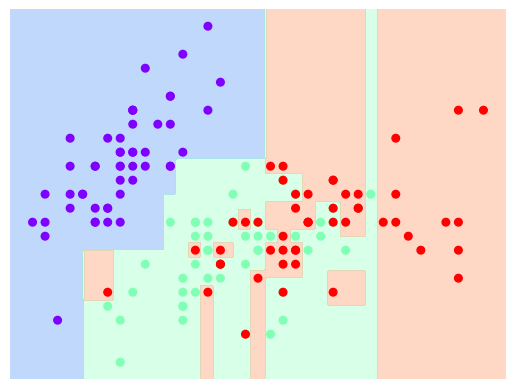

In [35]:
visualize_classifier(DecisionTreeClassifier(criterion='gini'), X, y)

/var/folders/h9/thx6895547x_97sspz8fvlph0000gn/T/ipykernel_68815/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


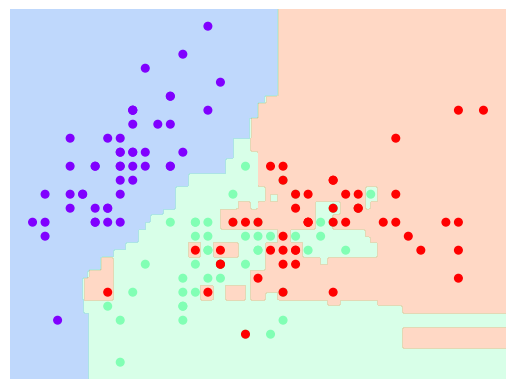

In [36]:
visualize_classifier(RandomForestClassifier(n_estimators=150, random_state=0), X, y)

## Principal Component Analysis

(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

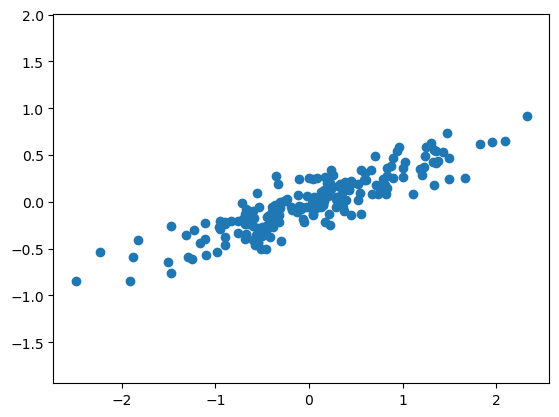

In [37]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T 
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [38]:
X.shape

(200, 2)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [40]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [41]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

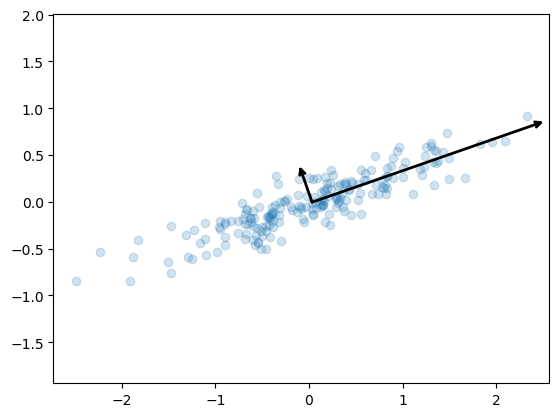

In [42]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) * 3
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [43]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(np.float64(-2.731158226766438),
 np.float64(2.609901883259332),
 np.float64(-0.9672765706389318),
 np.float64(1.006064230853995))

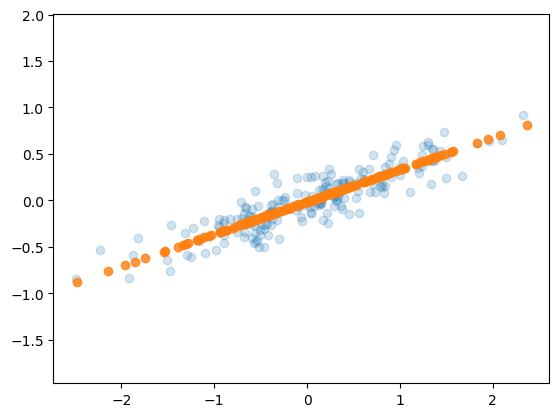

In [44]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [45]:
X, y = load_iris(return_X_y=True)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (150, 4)
transformed shape: (150, 2)


(np.float64(4.009918976326979),
 np.float64(8.098983407966248),
 np.float64(1.88),
 np.float64(4.5200000000000005))

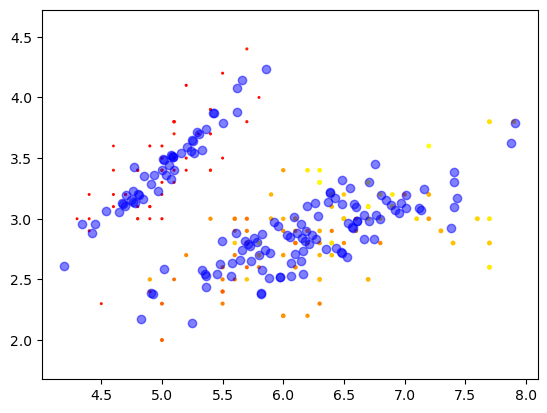

In [46]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], alpha=1, cmap='autumn')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5, c='blue')
plt.axis('equal')

In [47]:
pca.components_ #in terms of older dimensions

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [48]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [49]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Text(0, 0.5, 'cumulative explained variance')

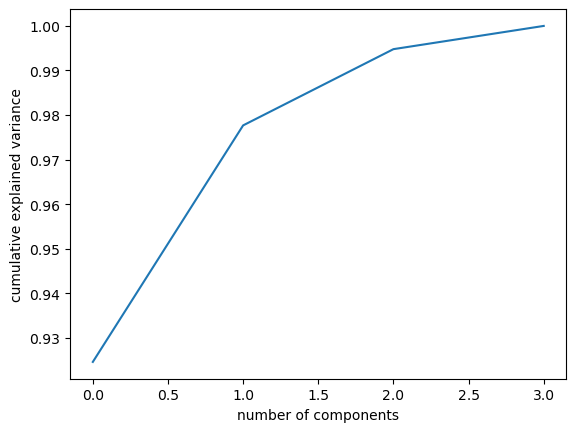

In [50]:
pca = PCA() #default is the number of features
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Focusing only two dimensions provides 98% of total variation in X.

## Neural Networks and Deep Learning

In [51]:
iris = sns.load_dataset('iris')

In [52]:
#Assign data from first four columns to X variable
X = iris.iloc[:, 0:4]

#Assign data from first fifth columns to y variable
y = iris.select_dtypes(include=[object])

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000) # default activation fnc. is relu (rectified linear unit), alternatives: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

The first parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 10 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.

The second parameter to MLPClassifier specifies the number of iterations, or the epochs, that you want your neural network to execute. Remember, one epoch is a combination of one cycle of feed-forward and back propagation phase.

By default the 'relu' activation function is used with 'adam' cost optimizer. However, you can change these functions using the activation and solver parameters, respectively.

In [57]:
predictions = mlp.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

